# Tutorial

In [1]:
# import all packages you will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.signal
import datetime
import glob
import math
import sys

In [2]:
# sys.path.append('../mtsthelens/')
# import preprocessing_functions, manipulation_functions #,plotting_functions
# # import  mtsthelens.preprocessing_functions

In [3]:
import sys, os
# Get the current script’s directory
current_directory = os.getcwd()
# Go back one folder level
parent_directory = os.path.abspath(os.path.join(current_directory, os.pardir))
sys.path.insert(0, parent_directory)
from mtsthelens import manipulation_functions,preprocessing_functions #,plotting_functions

## Read & preprocess data

In [4]:
# df =  preprocessing_functions.read_data('../data/DSAR_extended2_long.csv')
df =  preprocessing_functions.read_data('../example/Example_Data/example_data_eruption.csv')
df

,HSR,STD
time,,
2004-01-01 00:00:00,1.320679,0.729078
2004-01-01 00:10:00,1.185823,0.686037
2004-01-01 00:20:00,1.174698,0.643286
2004-01-01 00:30:00,1.139117,0.636975
2004-01-01 00:40:00,1.239182,0.685317
...,...,...
2005-12-31 23:10:00,1.198307,2.694916
2005-12-31 23:20:00,1.319133,2.717880
2005-12-31 23:30:00,1.416417,2.532738


In [5]:
# data smoothing
df = df.rolling('6H', center=True).median()

In [6]:
# remove outliers
df = df.apply(preprocessing_functions.mask_df,axis=0) # remove outliers (peak detection)

## Data manipulation

### Stack in Time

### Stack in Space

In [10]:
input_filename = 'example_data_eruption'
# df_dome = manipulation_functions.importData_extrusion()
# df_median = manipulation_functions.importData_seismic(input_filename)
df_median_stackSpace, df_stackSpace_year = manipulation_functions.stackInSpace(df)
df_yearlyParam = manipulation_functions.stackSpace_yearParam(df_stackSpace_year)
manipulation_functions.export_csv(input_filename,df_stackSpace_year,df_yearlyParam)

TypeError: 'int' object is not callable

### Apply Filter

/home/shreeya/miniconda3/lib/python3.11/site-packages/scipy/signal/_filter_design.py:480: RuntimeWarning: divide by zero encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /
/home/shreeya/miniconda3/lib/python3.11/site-packages/scipy/signal/_filter_design.py:480: RuntimeWarning: invalid value encountered in divide
  h = (npp_polyval(zm1, b, tensor=False) /


                              HSR           STD
time                                           
2004-01-01 00:00:00  9.881413e-17  6.064429e-17
2004-01-01 00:10:00  1.283450e-15  7.877901e-16
2004-01-01 00:20:00  8.383064e-15  5.146874e-15
2004-01-01 00:30:00  3.713697e-14  2.280923e-14
2004-01-01 00:40:00  1.268073e-13  7.792185e-14
...                           ...           ...
2005-12-31 23:10:00  6.106748e+00  3.815665e+00
2005-12-31 23:20:00  6.107410e+00  3.818287e+00
2005-12-31 23:30:00  6.108074e+00  3.820912e+00
2005-12-31 23:40:00  6.108738e+00  3.823541e+00
2005-12-31 23:50:00  6.109404e+00  3.826173e+00

[105264 rows x 2 columns]


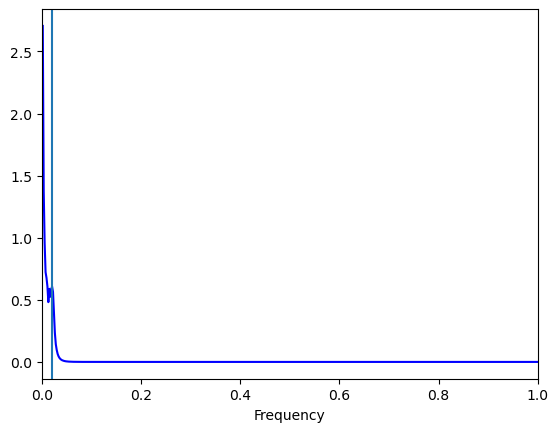

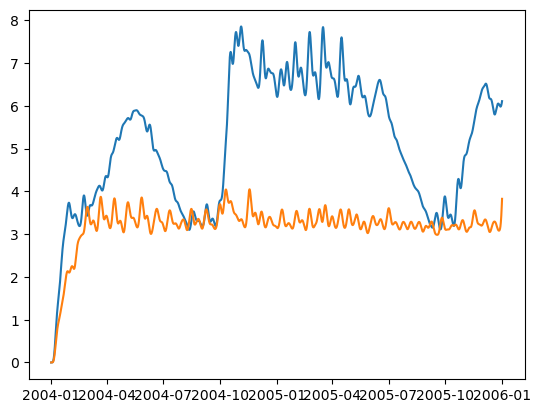

In [7]:
df = df.fillna(0)
df_filter = manipulation_functions.filter_data(df)
print(df_filter)
plt.figure()
plt.plot(df_filter)

## Data plotting

In [ ]:
# read extrusion rate data
df_dome = pd.read_csv('../data/dome_extrusion.txt', header=0, skiprows=0)
df_dome.set_index('Date of photography',inplace=True)
df_dome.index = pd.to_datetime(df_dome.index).tz_localize(None)
df_dome['diff'] = df_dome['Total volume change(x 106 m3)']-df_dome['Total volume change(x 106 m3)'].shift(1)
df_dome

,Total volume change(x 106 m3),Total volume change rate (m3/s),Extruded lava volume (x 106 m3),Lava extrusion rate (m3/s),diff
Date of photography,,,,,
2004-09-23,0,NaN,NaN,NaN,NaN
2004-10-04,5,NaN,NaN,NaN,5.0
2004-10-11,10,8.9,NaN,NaN,5.0
2004-10-13,11,6.4,0.54,NaN,1.0
2004-11-04,20,4.6,12.00,5.9,9.0
2004-11-29,27,3.0,21.00,4.4,7.0
2004-12-11,30,3.4,26.00,4.1,3.0
2005-01-03,35,2.4,31.00,2.5,5.0
2005-02-01,40,1.9,35.00,1.8,5.0


<AxesSubplot:xlabel='Date of photography'>

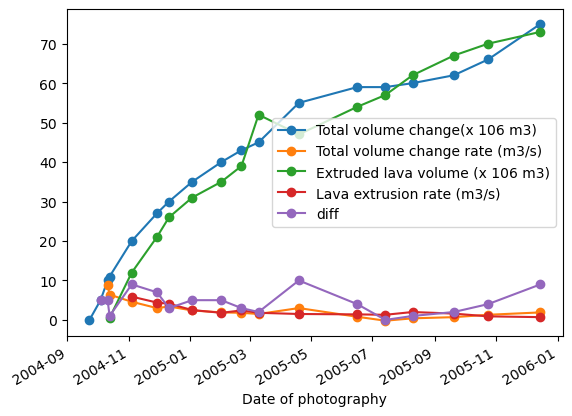

In [ ]:
df_dome.plot(marker='o')

In [ ]:
# load station coordinates and drop the stations which are not of interresst
sta_list =['BLIS', 'CDF', 'EDM', 'ELK', 'FL2', 'HOA', 'HSR', 'JRO', 'JUN', # specify the stations you want to use
           'LOO', 'MIDE', 'NED', 'RAFT', 'REM', 'SEP', 'SHW', 'SOS', 'SPN5',
           'STD', 'SUG', 'SWFL', 'TDL', 'USFR', 'VALT', 'YEL'] 

df = pd.read_csv('../data/sta_log_long.txt', sep='|', header=0) # coordinates
df = df[~df['Station'].isin(list(set(df.Station)-set(sta_list)))] # delete Stations which are not of interresst
df = df.drop_duplicates(subset=['Station']) # drop one station if the station is not unique
df = df.reset_index(drop=True)
df

,Network,Station,latitude,longitude,Elevation,Sitename,StartTime,EndTime
0,CC,BLIS,46.197472,-122.186569,2116.00,"Blister, Mt. St. Helens (Dome sta)",2004-10-12T00:00:00,2005-02-17T00:00:00
1,CC,HOA,46.241780,-122.191830,1151.00,Hoala,2021-06-08T00:00:00,2599-12-31T23:59:59
2,CC,JRO,46.275270,-122.218260,1219.00,Johnston Ridge Observatory,2004-10-02T00:00:00,2599-12-31T23:59:59
3,CC,LOO,46.223750,-122.184390,1521.35,Loowit,2021-06-08T00:00:00,2599-12-31T23:59:59
4,CC,MIDE,46.197750,-122.187439,2132.00,Near old BLIS MSH,2005-02-16T00:00:00,2005-07-26T00:00:00
5,CC,NED,46.200249,-122.185493,2060.00,"NE part of old Dome, Mt. St. Helens (Dome sta)",2004-11-20T00:00:00,2013-05-01T00:00:00
6,CC,RAFT,46.195679,-122.186317,2132.00,"RAFT, St Helens Crater",2005-07-28T00:00:00,2007-12-31T00:00:00
7,CC,REM,46.200200,-122.185500,1905.44,"Rembrant, Mount St. Helens",2018-07-25T00:00:00,2599-12-31T23:59:59
8,CC,SEP,46.199780,-122.190857,2114.00,"September lobe, Mt. St. Helens (Dome sta)",2004-11-05T00:00:00,2599-12-31T23:59:59
9,CC,SPN5,46.194698,-122.188370,2263.00,"Spine 5, St Helens Crater, WA",2007-06-18T00:00:00,2007-12-31T00:00:00


In [ ]:
# get the distance between the stations and sort them in increasing order (relative to station SEP -> crater center)
ref_sta = 'SEP' # define the reference station, we will get distance from all other stations to this station
df['dist'] = df.apply(lambda x: MtStHelens_functions.calculate_distance(x['latitude'],df.latitude[df['Station']==ref_sta] , x['longitude'],df.longitude[df['Station']==ref_sta] ), axis=1)
df = df.sort_values(by=['dist'])
sta_sorted = df['Station'].to_list()
df

,Network,Station,latitude,longitude,Elevation,Sitename,StartTime,EndTime,dist
8,CC,SEP,46.199780,-122.190857,2114.00,"September lobe, Mt. St. Helens (Dome sta)",2004-11-05T00:00:00,2599-12-31T23:59:59,0.000000
4,CC,MIDE,46.197750,-122.187439,2132.00,Near old BLIS MSH,2005-02-16T00:00:00,2005-07-26T00:00:00,0.346634
7,CC,REM,46.200200,-122.185500,1905.44,"Rembrant, Mount St. Helens",2018-07-25T00:00:00,2599-12-31T23:59:59,0.414926
5,CC,NED,46.200249,-122.185493,2060.00,"NE part of old Dome, Mt. St. Helens (Dome sta)",2004-11-20T00:00:00,2013-05-01T00:00:00,0.416109
0,CC,BLIS,46.197472,-122.186569,2116.00,"Blister, Mt. St. Helens (Dome sta)",2004-10-12T00:00:00,2005-02-17T00:00:00,0.418066
6,CC,RAFT,46.195679,-122.186317,2132.00,"RAFT, St Helens Crater",2005-07-28T00:00:00,2007-12-31T00:00:00,0.574494
9,CC,SPN5,46.194698,-122.188370,2263.00,"Spine 5, St Helens Crater, WA",2007-06-18T00:00:00,2007-12-31T00:00:00,0.596632
24,UW,YEL,46.209549,-122.188988,1750.00,"Yellow Rock, Mt. St. Helens",1981-10-01T00:00:00,2007-09-18T00:00:00,1.095744
12,CC,SWFL,46.188670,-122.202030,2268.00,Southwest Flank,2006-10-01T00:00:00,2013-08-28T00:00:00,1.505239
14,CC,VALT,46.214218,-122.189247,1681.00,"Vault, Mount St. Helens",2006-09-30T00:00:00,2599-12-31T23:59:59,1.610206
